<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>

# Non-Linear Regression
In this lab, we will explore the fascinating world of non-linear regression, a powerful method for modeling complex relationships between variables. While linear regression is effective for simple relationships, non-linear regression allows us to capture more intricate patterns that arise in real-world data.

### Objectives:
After completing this lab, you will be able to:

- Understand the concept of non-linear regression and its applications in data analysis.
- Identify scenarios where non-linear regression is more appropriate than linear regression.
- Implement non-linear regression using Python libraries like NumPy, SciPy, and scikit-learn.
- Explore different non-linear regression techniques, including exponential, logarithmic, sigmoidal, power, and Gaussian regression.
- Evaluate the performance of non-linear regression models using appropriate metrics.

By mastering non-linear regression, you will be equipped with a versatile toolset to model and analyze diverse datasets with non-linear relationships, providing valuable insights for solving complex problems in the field of construction engineering. This knowledge will enable you to make accurate predictions, optimize construction processes, and improve decision-making, contributing to advancements and innovations in the construction industry.

## Introduction to Non-linear Regression:

**Definition**: Non-linear regression is a statistical method used to model the relationship between independent variables and a dependent variable when the relationship is not linear.

**Application in construction**: Non-linear regression is commonly used to analyze complex engineering phenomena, such as material behavior, structural response, and hydraulic flow, where linear relationships may not adequately capture the underlying trends.

#### Import necessary libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

## 1- Polynomial Non-linear Regression:

-  Polynomial Functions: Polynomial functions involve powers of the independent variable $x$ raised to different degrees, allowing us to approximate a wide range of non-linear relationships.

-  General Polynomial Form: The general form of a polynomial non-linear regression model is:
$$ y = a_nx^n + a_{n-1}x^{n-1} + ... + a_1x + a_0  $$

- Degree of the Polynomial: The highest power $n$ of the independent variable $x$ in the equation is called the degree of the polynomial.

-  Example: We can use a polynomial regression model like $y = a x^3 + b x^2 + c x + d$ to represent relationships with curvature and varying slopes.

Let's take a look at the graph of the quartic function.

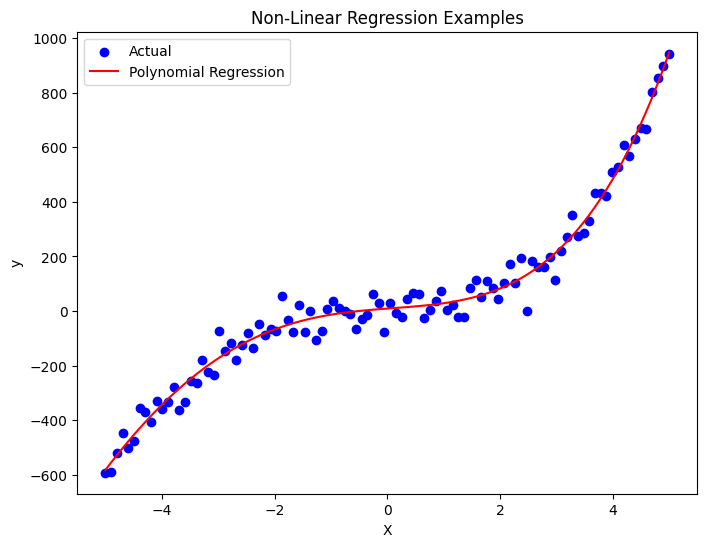

Polynomial Regression:
Mean Squared Error: 1907.7095
R2 Score: 0.9809



In [2]:
# Generate non-linear dataset
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y =  0.25*(X**4) + 6*(X**3) + 7*X + 12 + np.random.normal(0, 50, 100)

# Reshape X for polynomial regression
X = X.reshape(-1, 1)

# Polynomial Regression
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)
poly_mse = mean_squared_error(y, y_poly_pred)
poly_r2 = r2_score(y, y_poly_pred)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')

# Polynomial Regression plot
plt.plot(X, y_poly_pred, color='red', label='Polynomial Regression')

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model evaluation metrics
print("Polynomial Regression:")
print(f"Mean Squared Error: {poly_mse:.4f}")
print(f"R2 Score: {poly_r2:.4f}\n")



## 2- Non-polynomial Non-linear Regression:

-  Beyond Polynomials: Non-linear regression is not limited to polynomial functions; it can handle more complex functions involving exponentials, logarithms, trigonometric functions, and other non-linear components.

-  Example: A non-polynomial non-linear regression model could be $y = \log(x)$, which represents a logarithmic relationship between $x$ and $y$.

In the following sections, we will see some examples of Non-polynomial Non-linear Regression.

### 2-1- Exponential Regression

-  Exponential regression models relationships where the dependent variable grows or decays exponentially with the independent variable.

-  General Form: The exponential regression model takes the form:
$$ y=a⋅e^{(bx)} $$
  where $a$ and $b$ are the regression coefficients to be estimated.

-  Application: Exponential regression is commonly used in contruction to model phenomena where quantities grow or decay at an increasing or decreasing rate, such as population growth, decay of pollutants, or radioactive decay.

The following code block generates a non-linear dataset and then performs exponential regression to fit an exponential function to the data. The optimized parameters (a and b) are obtained using curve_fit. The resulting exponential function is then plotted along with the actual data. Finally, the Mean Squared Error and R-squared metrics are printed to evaluate the performance of the exponential regression model.

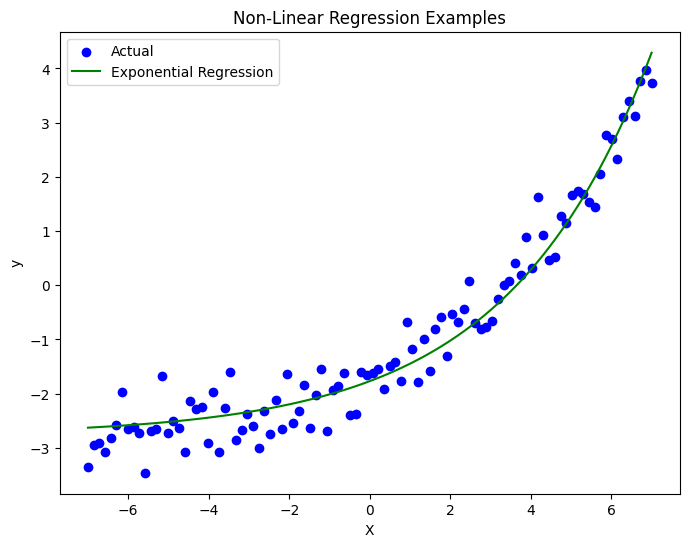

Exponential Regression:
Mean Squared Error: 0.1580
R2 Score: 0.9563



In [3]:
# Generate non-linear dataset
X = np.linspace(-7, 7, 100)
y = -3 + 1.25 * np.exp(0.25 * X) + np.random.normal(0, 0.4, 100)

# Exponential Regression
def exponential_func(x, a, b):
  y= a + np.exp(b * x)
  return y

# Using curve_fit to fit the exponential function to the data
# popt contains the optimized values of the parameters (a and b) that minimize the sum of squared residuals
# pcov contains the estimated covariance of popt
popt, pcov = curve_fit(exponential_func, X, y)

# Predicting y values using the optimized parameters (a and b)
y_exp_pred = exponential_func(X, *popt)

# Calculate Mean Squared Error and R-squared for model evaluation
exp_mse = mean_squared_error(y, y_exp_pred)
exp_r2 = r2_score(y, y_exp_pred)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')


# Exponential Regression plot
plt.plot(X, y_exp_pred, color='green', label='Exponential Regression')

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model evaluation metrics
print("Exponential Regression:")
print(f"Mean Squared Error: {exp_mse:.4f}")
print(f"R2 Score: {exp_r2:.4f}\n")

### 2-2- Logarithmic Regression

-  Logarithmic regression models relationships where the dependent variable changes logarithmically with the independent variable.

-  General Form: The logarithmic regression model is represented as: $ y=a⋅log (bx)$ where $a$ and $b$ are the regression coefficients to be determined.

-  Application: Logarithmic regression is often used in construction for scenarios where the response is expected to change slowly or plateau over time, such as the creep behavior of materials or consolidation settlement of soils.

The following code block fits a logarithmic function to the data.

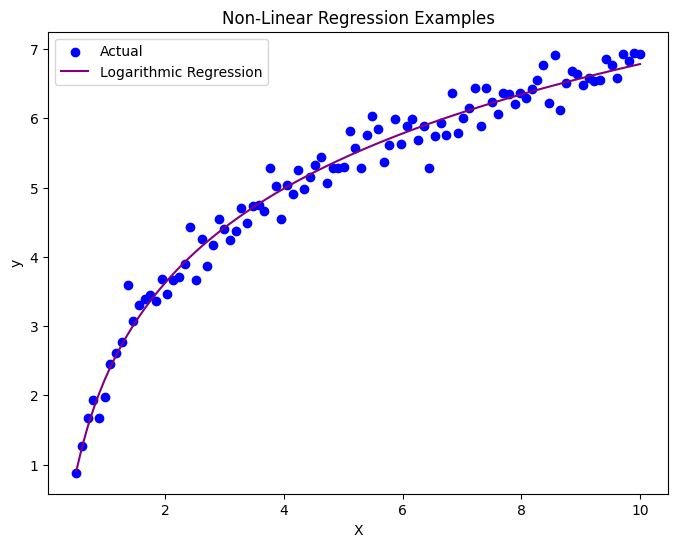

Logarithmic Regression:
Mean Squared Error: 0.0457
R2 Score: 0.9778



In [4]:
# Generate non-linear dataset
X = np.linspace(0.5, 10, 100)
y = 2 * np.log(3*X) + np.random.normal(0, 0.2, 100)

# Logarithmic Regression
def logarithmic_func(x, a, b):
    return a*np.log(b * x)

# Using curve_fit to fit the logarithmic function to the data
# popt contains the optimized values of the parameters (a and b) that minimize the sum of squared residuals
# pcov contains the estimated covariance of popt
popt, pcov  = curve_fit(logarithmic_func, X, y)

# Predicting y values using the optimized parameters (a and b)
y_log_pred = logarithmic_func(X, *popt)

# Calculate Mean Squared Error and R-squared for model evaluation
log_mse = mean_squared_error(y, y_log_pred)
log_r2 = r2_score(y, y_log_pred)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')


# Logarithmic Regression plot
plt.plot(X, y_log_pred, color='purple', label='Logarithmic Regression')

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model evaluation metrics
print("Logarithmic Regression:")
print(f"Mean Squared Error: {log_mse:.4f}")
print(f"R2 Score: {log_r2:.4f}\n")

### 2-3- Sigmoidal/Logistic Regression

-  Sigmoidal regression, also known as logistic regression, models relationships where the dependent variable exhibits an S-shaped curve in response to the independent variable.
-  General Form: The logistic regression model is given by:
$$ y =  \frac{a}{1+ e^{-b(x-c)}}$$

  where $a$, $b$, and $c$ are the regression parameters.

-  Application: Sigmoidal regression is widely used in civil engineering to model various processes with limited growth, such as concrete strength gain, population growth reaching carrying capacity, or the spread of diseases.

The following code block fits a Sigmoidal/Logistic function to the data.

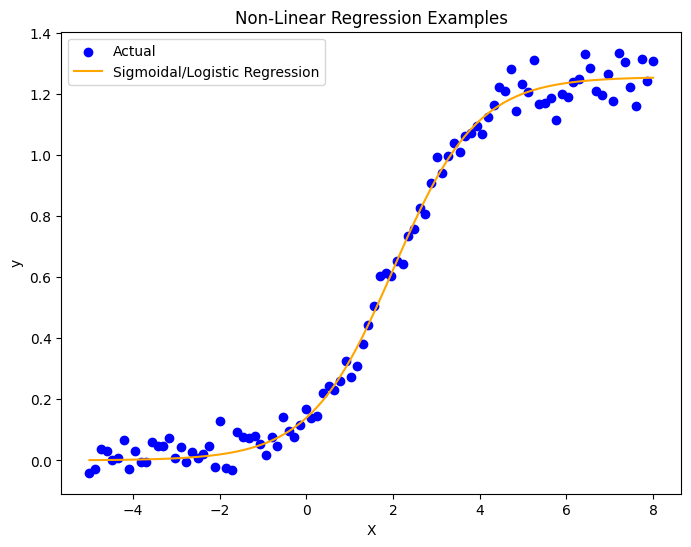

Sigmoidal/Logistic Regression:
Mean Squared Error: 0.0019
R2 Score: 0.9930



In [5]:
# Generate non-linear dataset
X = np.linspace(-5, 8, 100)
y = 1.25 / (1 + np.exp(-1 * (X - 2))) + np.random.normal(0, 0.05, 100)


# Sigmoidal/Logistic Regression
def sigmoid_func(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Using curve_fit to fit the sigmoidal/logistic function to the data
# popt contains the optimized values of the parameters (a, b, and c) that minimize the sum of squared residuals
# pcov contains the estimated covariance of popt
popt, pcov = curve_fit(sigmoid_func, X, y)

# Predicting y values using the optimized parameters (a, b, and c)
y_sig_pred = sigmoid_func(X, *popt)

# Calculate Mean Squared Error and R-squared for model evaluation
sig_mse = mean_squared_error(y, y_sig_pred)
sig_r2 = r2_score(y, y_sig_pred)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')


# Sigmoidal/Logistic Regression plot
plt.plot(X, y_sig_pred, color='orange', label='Sigmoidal/Logistic Regression')

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model evaluation metrics
print("Sigmoidal/Logistic Regression:")
print(f"Mean Squared Error: {sig_mse:.4f}")
print(f"R2 Score: {sig_r2:.4f}\n")

### 2-4- Power Regression

-  Power regression models relationships where the dependent variable varies as a power function of the independent variable.

-  General Form: The power regression model is expressed as: $$ y=a⋅x^b $$
  where $a$ and $b$ are the regression coefficients to be estimated.

-  Application: Power regression is commonly used in construction for scenarios where the rate of change in the dependent variable is proportional to the magnitude of the independent variable, such as flow rate through pipes or settling velocity of particles in fluids.

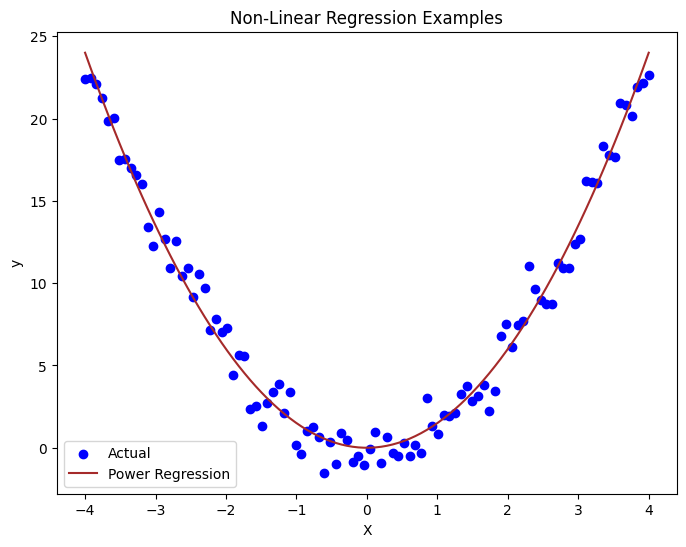

In [6]:
# Generate non-linear dataset
X = np.linspace(-4, 4, 100)
y = 1.5 * np.power(X,2) # Creating the target values based on a quadratic relationship
noise = np.random.normal(0, 1, 100) # Adding random noise to the target values

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y+noise, color='blue', label='Actual') # Plotting the noisy data points

# Power Regression plot
plt.plot(X, y, color='brown', label='Power Regression') # Plotting the underlying quadratic relationship

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### 2-5- Gaussian Regression

-  Gaussian regression models relationships where the dependent variable follows a bell-shaped Gaussian distribution in response to the independent variable.

-  General Form: The Gaussian regression model can be represented as:
$$ y=a⋅e^{-\frac{(x-μ)^2}{2σ^2}} $$

  where $a$, $\mu$, and $\sigma$ are the regression parameters to be determined.

-  Application: Gaussian regression is employed in construction for analyzing phenomena that exhibit normal distribution patterns, such as environmental noise modeling or material strength testing.

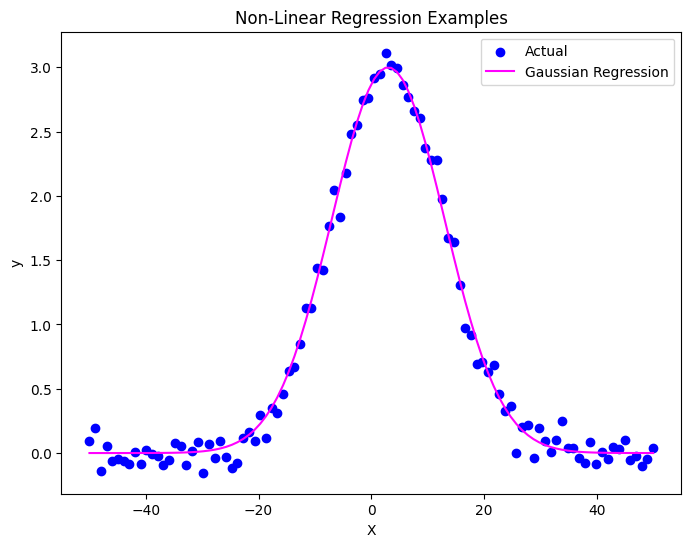

In [7]:
# Generate non-linear dataset
X = np.linspace(-50, 50, 100)
y = 3 * np.exp(-np.power((X -3), 2) / (2 * np.power(10, 2))) # Creating the target values based on a Gaussian relationship
noise = np.random.normal(0, 0.1, 100)  # Adding random noise to the target values

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y+noise, color='blue', label='Actual')  # Plotting the noisy data points

# Gaussian Regression plot
plt.plot(X, y, color='magenta', label='Gaussian Regression') # Plotting the underlying Gaussian relationship

plt.title("Non-Linear Regression Examples")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 3- Advanced Non-linear Functions:

-  Complex Non-linear Models: In engineering, we often encounter intricate relationships that involve multiple non-linear components.

-  Example: A more advanced non-linear regression model could be $y = \log(ax^3 + bx^2 + cx + d)$, which combines polynomial terms and a logarithmic function.

-  Further discussion on this topic is beyond the scope of this class.


## Non-Linear Regression Example

### Step 1: Load the dataset

In [8]:
# Load the dataset
url = 'https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/world-data-2023.csv'
df = pd.read_csv(url)
# Display the first few rows of the dataset
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


#### `world-data-2023.csv`:

This extensive dataset offers a vast array of data concerning countries across the globe, encompassing a diverse range of indicators and characteristics. It includes information on demographics, economic performance, environmental aspects, healthcare measures, education metrics, and numerous other factors. This dataset provides a comprehensive and in-depth understanding of countries worldwide.

<details><summary>Click here for information about the features of the dataset</summary>

    Name -- Description
1.   **Country**: Name of the country.
2.   **Density (P/Km2)**: Population density measured in persons per square kilometer.
3.   **Abbreviation**: Abbreviation or code representing the country.
4.  **Agricultural Land (%)**: Percentage of land area used for agricultural purposes.
5.  **Land Area (Km2)**: Total land area of the country in square kilometers.
6.  **Armed Forces Size**: Size of the armed forces in the country.
7.  **Birth Rate**: Number of births per 1,000 population per year.
8.  **Calling Code**: International calling code for the country.
9.  **Capital/Major City**: Name of the capital or major city.
10.  **CO2 Emissions**: Carbon dioxide emissions in tons.
11.  **CPI**: Consumer Price Index, a measure of inflation and purchasing power.
12.  **CPI Change (%)**: Percentage change in the Consumer Price Index compared to the previous year.
13.  **Currency_Code**: Currency code used in the country.
14.  **Fertility Rate**: Average number of children born to a woman during her lifetime.
15.  **Forested Area (%)**: Percentage of land area covered by forests.
16.  **Gasoline_Price**: Price of gasoline per liter in local currency.
17. **GDP**: Gross Domestic Product, the total value of goods and services produced in the country.
18. **Gross Primary Education Enrollment (%)**: Gross enrollment ratio for primary education.
19. **Gross Tertiary Education Enrollment (%)**: Gross enrollment ratio for tertiary education.
20. **Infant Mortality**: Number of deaths per 1,000 live births before reaching one year of age.
21. **Largest City**: Name of the country's largest city.
22. **Life Expectancy**: Average number of years a newborn is expected to live.
23. **Maternal Mortality Ratio**: Number of maternal deaths per 100,000 live births.
24. **Minimum Wage**: Minimum wage level in local currency.
25. **Official Language**: Official language(s) spoken in the country.
26. **Out of Pocket Health Expenditure (%)**: Percentage of total health expenditure paid out-of-pocket by individuals.
27. **Physicians per Thousand**: Number of physicians per thousand people.
28. **Population**: Total population of the country.
29. **Population: Labor Force Participation (%)**: Percentage of the population that is part of the labor force.
30. **Tax Revenue (%)**: Tax revenue as a percentage of GDP.
31. **Total Tax Rate**: Overall tax burden as a percentage of commercial profits.
32. **Unemployment Rate**: Percentage of the labor force that is unemployed.
33. **Urban Population**: Percentage of the population living in urban areas.
34. **Latitude**: Latitude coordinate of the country's location.
35. **Longitude**: Longitude coordinate of the country's location.
</details>

[`Data source`](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023?datasetId=3495122&sortBy=voteCount)

### Step 2: Cleaning the numerical data

In this section, the code takes a DataFrame containing various columns with different data types (including string representations of numeric values with special characters), cleans the values by removing any unwanted characters, and converts the cleaned values into numeric (float) data type for further analysis or computations. This data preparation step is essential when working with datasets that contain mixed data types and require numerical processing.

In [9]:
# List of columns to be processed
columns = [
    "Density\n(P/Km2)",
    "Agricultural Land( %)",
    "Land Area(Km2)",
    "Co2-Emissions",
    "CPI",
    "CPI Change (%)",
    "Fertility Rate",
    "Forested Area (%)",
    "Gasoline Price",
    "GDP",
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
    "Infant mortality",
    "Life expectancy",
    "Maternal mortality ratio",
    "Minimum wage",
    "Out of pocket health expenditure",
    "Physicians per thousand",
    "Population",
    "Population: Labor force participation (%)",
    "Tax revenue (%)",
    "Total tax rate",
    "Unemployment rate",
    "Urban_population",
]

# Import the regular expression library
import re

# Function to convert and clean values in the columns
def Retype(x):
  # Check if the value is not a string (i.e., already numeric)
    if type(x) != str:
        return x
    # Use regular expression to remove '%' signs, '$' signs, and commas from the value
    x = re.sub(r"%|\$|,", "", x)
    # Convert the cleaned value to a float
    return float(x)

# Loop through each column in the list and apply the Retype function to the column in the DataFrame
for column in columns:
    df[column] = df[column].apply(Retype)

# Display the first few rows of the dataset after the data conversion
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,"323,000",32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,"9,000",11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,"317,000",24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,"117,000",40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


### Step 3: Data Visualization

A scatter plot allows us to understand if there is any correlation or pattern between these two variables. Here we have the scatter plot of "GDP_Per_Capita" (x-axis) against "Infant mortality" (y-axis). As you can see, it looks like the $1/x$ function, which is a power function.

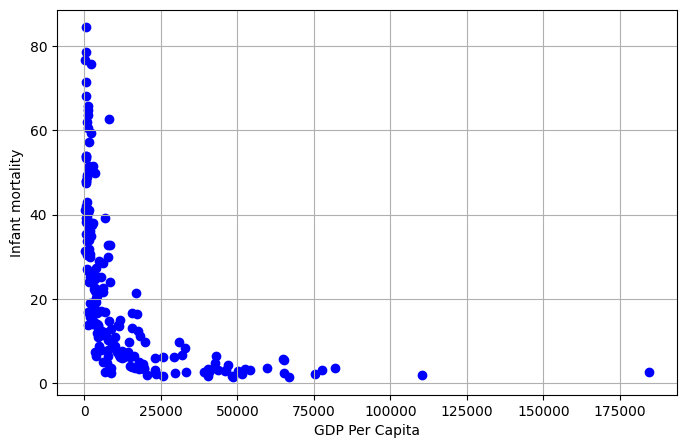

In [10]:
# Create a new column for "GDP/Population"
df['GDP_Per_Capita'] = df['GDP'] / df['Population']

# Plot the "GDP_Per_Capita" (x-axis) against "Infant mortality" (y-axis)
plt.figure(figsize=(8, 5))
plt.scatter(df['GDP_Per_Capita'], df['Infant mortality'], color='blue')
plt.xlabel('GDP Per Capita')
plt.ylabel('Infant mortality')
plt.grid(True)
plt.show()

### Step 4: Power regression

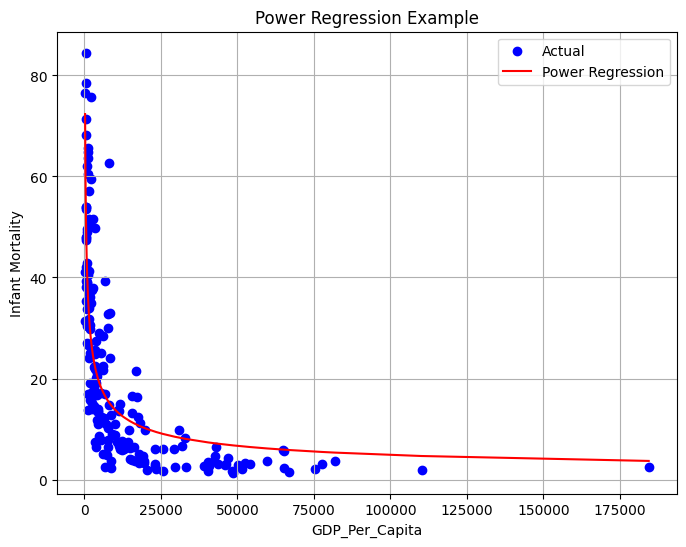

Power Regression:
Mean Squared Error: 141.0203
R2 Score: 0.6290



In [11]:
# Sort the DataFrame by 'GDP_Per_Capita' column
df.sort_values(by='GDP_Per_Capita', inplace=True)

# Define the Power Regression function
def power_func(x, a, b):
    return a * np.power(x, b)

# Drop rows with NaN values in 'GDP_Per_Capita' and 'Infant mortality'
df = df.dropna(subset=['GDP_Per_Capita', 'Infant mortality'])

# Perform the power regression
popt, pcov = curve_fit(power_func, df['GDP_Per_Capita'], df['Infant mortality'])
y_power_pred = power_func(df['GDP_Per_Capita'], *popt)
power_mse = mean_squared_error(df['Infant mortality'], y_power_pred)
power_r2 = r2_score(df['Infant mortality'], y_power_pred)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP_Per_Capita'], df['Infant mortality'], color='blue', label='Actual')

# Power Regression plot
plt.plot(df['GDP_Per_Capita'], y_power_pred, color='red', label='Power Regression')

plt.title("Power Regression Example")
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Infant Mortality')
plt.legend()
plt.grid(True)
plt.show()

# Print model evaluation metrics
print("Power Regression:")
print(f"Mean Squared Error: {power_mse:.4f}")
print(f"R2 Score: {power_r2:.4f}\n")

### **Conclusion**
Non-linear regression offers a powerful and flexible approach to model complex relationships in data. Throughout this lab, we explored various techniques, such as exponential, logarithmic, sigmoidal, power, and Gaussian regression. By applying best practices and evaluating model performance, we gained valuable insights and made accurate predictions. Non-linear regression proves invaluable for understanding intricate patterns and phenomena in real-world scenarios.

## Practice

Now let's visualize the scatter plot of `"Infant mortality"` (x-axis) against `"Birth Rate"` (y-axis).

Which of the regressions we learned today would be appropriate for this data? Fit the one you think works best.

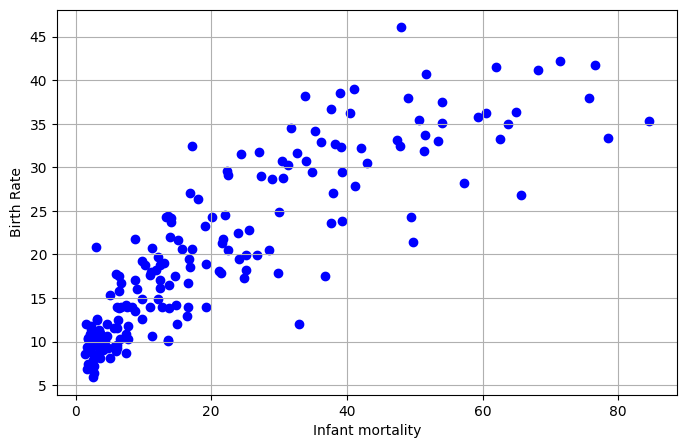

In [12]:
# Plot the "Infant mortality" (x-axis) against "Birth Rate" (y-axis)
plt.figure(figsize=(8, 5))
plt.scatter(df['Infant mortality'], df['Birth Rate'], color='blue')
plt.xlabel('Infant mortality')
plt.ylabel('Birth Rate')
plt.grid(True)
plt.show()

In [13]:
#Your Code Here

<details><summary>Click here for the answer</summary>

This scatter plot looks like the data follows a power or logarithmic function. We tried both, and the results showed that power regression performed better here.

```python    
# Sort the DataFrame by 'Infant mortality' column
df.sort_values(by='Infant mortality', inplace=True)

# Define the Power Regression function
def power_func(x, a, b):
    return a * np.power(x, b)

# Drop rows with NaN values in 'Infant mortality' and 'Birth Rate'
df = df.dropna(subset=['Infant mortality', 'Birth Rate'])

# Perform the power regression
popt, pcov = curve_fit(power_func, df['Infant mortality'], df['Birth Rate'])
y_power_pred = power_func(df['Infant mortality'], *popt)
power_mse = mean_squared_error(df['Birth Rate'], y_power_pred)
power_r2 = r2_score(df['Birth Rate'], y_power_pred)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(df['Infant mortality'], df['Birth Rate'], color='blue', label='Actual')

# Power Regression plot
plt.plot(df['Infant mortality'], y_power_pred, color='red', label='Power Regression')

plt.title("Power Regression Example")
plt.xlabel('Infant mortality')
plt.ylabel('Birth Rate')
plt.legend()
plt.grid(True)
plt.show()

# Print model evaluation metrics
print("Power Regression:")
print(f"Mean Squared Error: {power_mse:.4f}")
print(f"R2 Score: {power_r2:.4f}\n")

```

</details>

### Thank you and good luck!